In [ ]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
import numpy as np
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil  # Библиотека для работы с файлами
import moviepy.editor as mpy  # Библиотека для записи видео
import glob  # расширение для использования Unix обозначений при задании пути к файлу
import cv2

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def makeDataset(im):
  height, width = im.shape[:2]
  lab = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
  lab = np.float32(np.array(lab)) / 255

  # Разделим на xTrain и yTrain
  X = lab[:,:,0] # xTrain - это только канал яркости
  Y = lab[:,:,1:] # yTrain - это два цветоразностных канала

  X = X.reshape(height, width, 1)
  Y = Y.reshape(height, width, 2)

  return X, Y

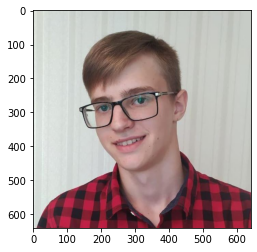

Ширина: 640  Высота: 640


In [ ]:
imgFile = "/content/drive/MyDrive/Colab Notebooks/Machine_learning/Images/8_Coloring_bw_video/Gleb.jpg"

img = cv2.cvtColor(cv2.imread(imgFile), cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

plt.imshow(img)
plt.show()

print("Ширина:", width, " Высота:", height)

In [ ]:
X, Y = makeDataset(img)

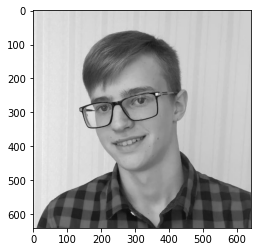

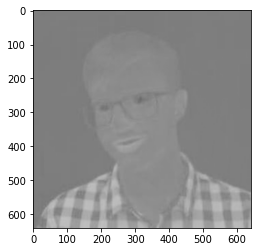

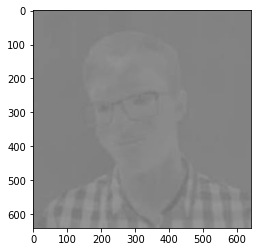

In [ ]:
# Посмотрим, что твориться в каждом из каналов

L_arr = X[(...,0)]*255
L = Image.fromarray(L_arr.reshape(height, width)).convert('RGB');

A_arr = Y[(...,0)]*255
A = Image.fromarray(A_arr.reshape(height, width)).convert('RGB');

B_arr = Y[(...,1)]*255
B = Image.fromarray(B_arr.reshape(height, width)).convert('RGB');

plt.imshow(L)
plt.show()

plt.imshow(A)
plt.show()

plt.imshow(B)
plt.show()

In [ ]:
i = [ [1], [2], [3], [4] ]
print(i)

[[1], [2], [3], [4]]


In [ ]:


i = np.array([ [128, 34], [123, 56], [78, 66] ])
#print(i)
print(i[(...,1)])

b = [ 0, -1, 200, 289 ]
print(np.clip(b, 0, 255))


[34 56 66]
[  0   0 200 255]


In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(height, width, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(1024, (3, 3), activation='relu', padding='same'))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))


model.add(UpSampling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))


model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 640, 640, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 320, 320, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 320, 320, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 320, 320, 128)     147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 160, 160, 128)     147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 160, 160, 256)     295168    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 160, 160, 256)     5

In [ ]:
xTrain = X.reshape(1, height, width, 1)
yTrain = Y.reshape(1, height, width, 2)

print(xTrain.shape)
print(yTrain.shape)

(1, 640, 640, 1)
(1, 640, 640, 2)


In [ ]:
# Тренируем нейронку

model.fit(x=xTrain, y=yTrain, batch_size=1, epochs=300)

Epoch 1/300
1/1 [==============================] - 39s 39s/step - loss: 0.2777
Epoch 2/300
1/1 [==============================] - 0s 433ms/step - loss: 0.2075
Epoch 3/300
1/1 [==============================] - 0s 443ms/step - loss: 0.2271
Epoch 4/300
1/1 [==============================] - 0s 445ms/step - loss: 0.2271
Epoch 5/300
1/1 [==============================] - 0s 434ms/step - loss: 0.2271
Epoch 6/300
1/1 [==============================] - 0s 430ms/step - loss: 0.2271
Epoch 7/300
1/1 [==============================] - 0s 426ms/step - loss: 0.2271
Epoch 8/300
1/1 [==============================] - 0s 431ms/step - loss: 0.2271
Epoch 9/300
1/1 [==============================] - 0s 431ms/step - loss: 0.2271
Epoch 10/300
1/1 [==============================] - 0s 431ms/step - loss: 0.2271
Epoch 11/300
1/1 [==============================] - 0s 432ms/step - loss: 0.2271
Epoch 12/300
1/1 [==============================] - 0s 429ms/step - loss: 0.2271
Epoch 13/300
1/1 [====================

In [ ]:
def decodeImage(x, ab_predict):
  a = ab_predict[(...,0)] * 255;
  b = ab_predict[(...,1)] * 255;

  a = np.clip(a, 0, 255)
  b = np.clip(b, 0, 255)

  # Создадим пустой массив, с размерами нашей картинки и тремя каналами цвета
  lab = np.zeros((height, width, 3))

  # Копируем в массив данные в нужной последовательности
  lab[:,:,0] = x * 255
  lab[:,:,1] = a
  lab[:,:,2] = b

  # Преобразуем к целым 8-битным числам без знака
  lab = np.uint8(lab)

  rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

  return rgb

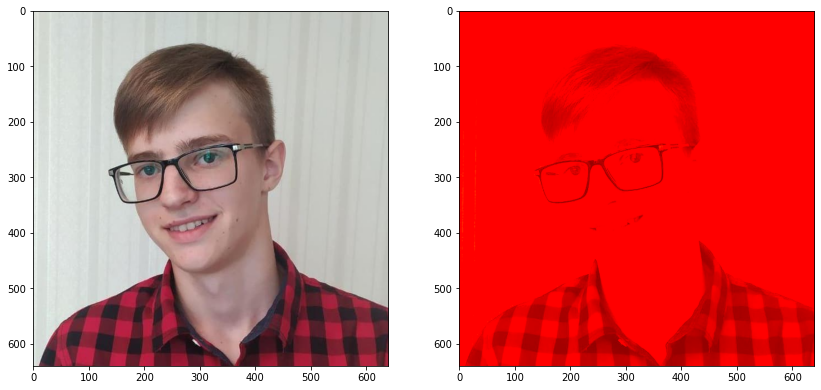

In [ ]:
output = model.predict(xTrain)

rgb = decodeImage(X[(...,0)], output[0])

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(rgb)



# Раскрашиваем все кадры нашего видео



In [ ]:
frameFiles = "/content/drive/MyDrive/ITHub/ML/video" # Источник видео
videoDir = '/content/color_video' # Место сохранения видео

In [ ]:
if os.path.isdir(videoDir): 
  shutil.rmtree(videoDir+'/')  # удаляем каталог вместе с содержимым
os.mkdir(videoDir) # Создаем директорию для выгрузке раскрашенных файлов

In [ ]:
# Получаем список всех фрэймов
framesList = os.listdir(frameFiles)

c = 1
s = len(framesList)

for f in framesList:
  inpFile = frameFiles+"/"+f
  outFile = videoDir+"/"+f

  print(c, "("+str(s)+")  ", outFile)

  img = cv2.cvtColor(cv2.imread(inpFile, cv2.IMREAD_GRAYSCALE), cv2.COLOR_BGR2RGB)
  height, width = img.shape[:2]

  # Переводим изображение в модель LAB и берем только яркостную компоненту
  x, _ = makeDataset(img)
  x = x.reshape(1, height, width, 1)

  # Раскрашиваем изображение с помощью нашей нейросети
  pred = model.predict(x)

  # Переводим вывод нейросети в палитру RGB
  rgb = decodeImage(x[(...,0)], pred[0])

  # Переводим фрейм в палитру BGR (так как все вспомогательные функции OpenCV работают именно в BGR)
  bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)

  # Записываем фрэйм в файл
  cv2.imwrite(outFile, bgr)

  c += 1



In [ ]:
# Собираем из отдельных кадров наше видео

if os.path.isdir(videoDir):
	video_name = 'second_video.mp4'
	fps = 30

	files = glob.glob(videoDir + '/*.png')
	files.sort()

	file_list = []
	for i in files:
		for j in range(3):
			file_list.append(i)

	clip = mpy.ImageSequenceClip(file_list, fps=fps)
	clip.write_videofile(video_name)